<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_14_2_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### https://keras.io/ko/applications/
!pip uninstall -y keras
!pip uninstall -y tensorflow

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


In [ ]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 132 kB 5.4 MB/s 
     |████████████████████████████████| 103 kB 34.0 MB/s 
     |████████████████████████████████| 400 kB 38.5 MB/s 
     |████████████████████████████████| 242 kB 43.5 MB/s 
     |████████████████████████████████| 2.3 MB 40.9 MB/s 
     |████████████████████████████████| 4.1 MB 31.2 MB/s 
     |████████████████████████████████| 4.1 MB 47.8 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 312 kB 50.2 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 240 kB 46.1 MB/s 
     |████████████████████████████████| 379 kB 41.3 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 15.3 MB 214 kB/s 
     |████████████████████████████████| 1.0 MB 35.6 MB/s 
     |████████████████████████████████| 66 kB 5.0 MB/s 
     |████████████████████████████████| 158 kB 44.6 MB/s 
     |█████████████████

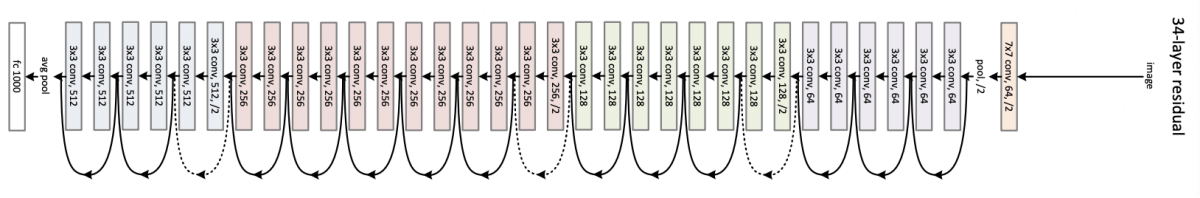

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
model = ResNet50(include_top=True,
    weights="imagenet", #none 이면 2500만 그냥 이니셜라이즈
    #상어, 송사리 등만 모아놓은 것도 있음, 그건 아쿠아리움과...
    #나무를 학습하는 학습모델이 있으면, 소나무, 느티나무 등을 구분할 수 있음
    #엉뚱한 값이 튀어나옴
    classes=1000)#프리트레인드 모델 이메지 넷
    #웹학습..?

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
img_path = 'otter1.jpg'#'elephant2.png'
img = image.load_img(img_path, target_size=(224, 224))

In [ ]:
#img_path = 'otter1.jpg'#'elephant2.png'
#img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# 결과를 튜플의 리스트(클래스, 설명, 확률)로 디코딩합니다
# (배치 내 각 샘플 당 하나의 리스트)
print('Predicted:', decode_predictions(preds, top=5)[0])#=3
# 예측결과: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n02444819', 'otter', 0.7243627), ('n02363005', 'beaver', 0.08126845), ('n02361337', 'marmot', 0.0802079), ('n02077923', 'sea_lion', 0.030448101), ('n01622779', 'great_grey_owl', 0.020819558)]


In [ ]:
type(preds)

numpy.ndarray

In [ ]:
preds.shape

(1, 1000)

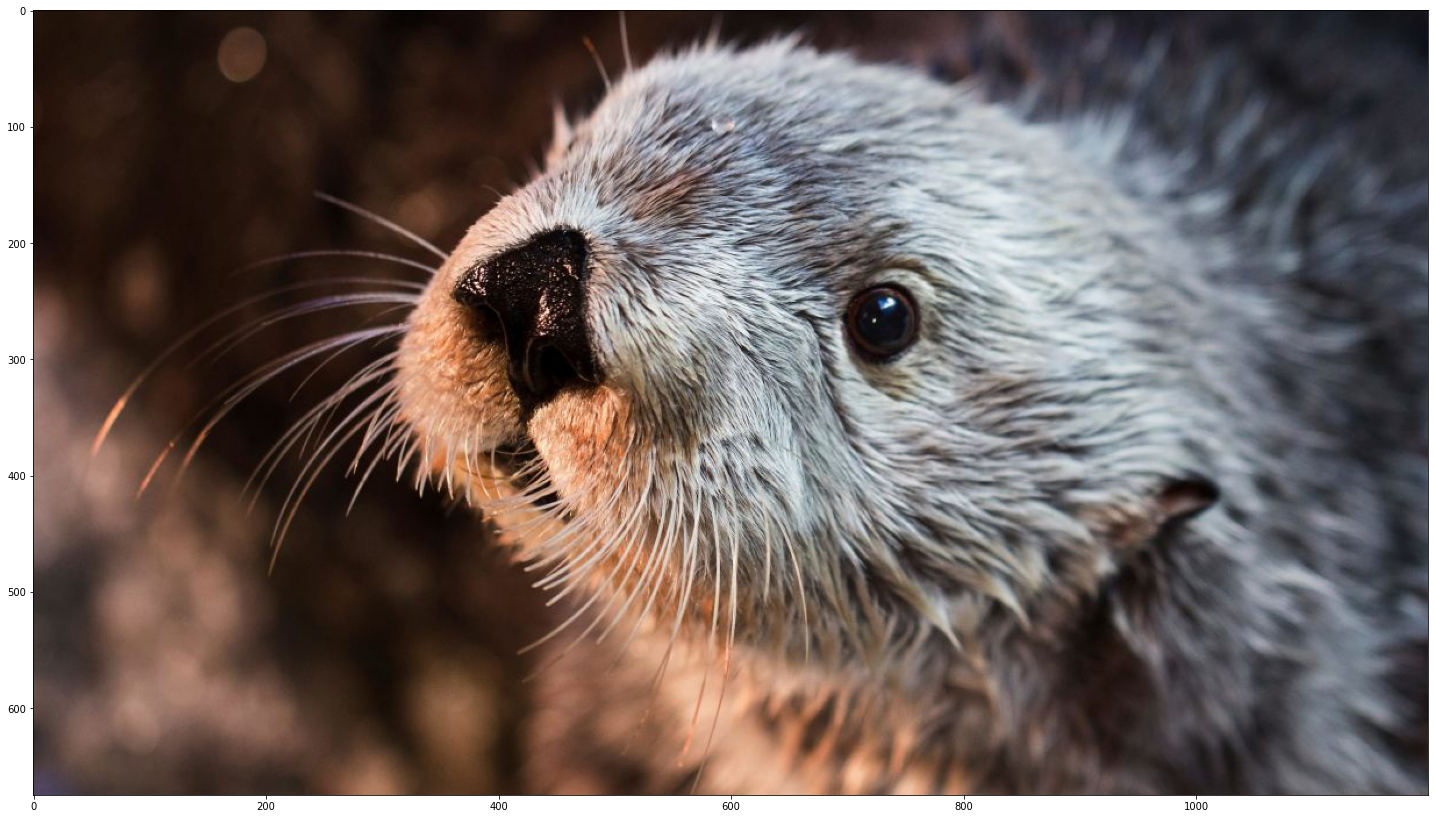

In [ ]:
import os
import sys
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

image = Image.open(img_path).convert("RGB")

plt.figure(figsize=(25,20))
plt.imshow(image)
plt.show()
plt.close()